# Analyzing Stock Data

Introduction:
In this project I put my Python skills and financial knowledge to the test by analyzing the monthly stock prices of two prominent E-commerce companies, Amazon (AMZN) and eBay (EBAY). The goal was to assess the risk and return associated with investing in these companies. 

By diving into the data, I calculated rates of return and examined key statistics such as variance and correlation. This project allowed me to gain valuable insights into the investment potential of Amazon and eBay. In the following sections, I will share my findings and provide a comprehensive analysis of these investments.

# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Inspect Data and Code

Functions to calculate various rates and get to a conclusion.

In [2]:
def display_as_percentage(val):
    return '{:.1f}%'.format(val*100)

amazon_prices = [1699.8, 1777.44, 2012.71, 2003.0, 1598.01, 1690.17, 1501.97, 1718.73, 1639.83, 1780.75, 1926.52, 1775.07, 1893.63]
ebay_prices = [35.98, 33.2, 34.35, 32.77, 28.81, 29.62, 27.86, 33.39, 37.01, 37.0, 38.6, 35.93, 39.5]

from math import log, sqrt

# Calculate Log Return
def calculate_log_return(start_price, end_price):
    return log(end_price / start_price)

# Calculate Variance
def calculate_variance(dataset):
    mean = sum(dataset)/len(dataset)
    numerator = 0
    for data in dataset:
        numerator += (data-mean) ** 2
    return numerator / len(dataset)

# Calculate Standard Deviation
def calculate_stddev(dataset):
    variance = calculate_variance(dataset)
    return sqrt(variance)

# Calculate Correlation Coefficient
def calculate_correlation(set_x, set_y):
    sum_x = sum(set_x)
    sum_y = sum(set_y)
    
    sum_x2 = sum([x ** 2 for x in set_x])
    sum_y2 = sum([y ** 2 for y in set_y])
    sum_xy = sum([x * y for x,y in zip(set_x, set_y)])
    
    n = len(set_x)
    numerator = n * sum_xy - sum_x * sum_y
    denominator = sqrt((n * sum_x2 - sum_x ** 2) * (n * sum_y2 - sum_y ** 2))
    return numerator / denominator

## Calculate Rate of Return

In [3]:
def get_returns(prices):
  returns = []
  for i in range(1, len(prices)):
    start_price = prices[i]
    end_price = prices[i-1]
    returns.append(calculate_log_return(end_price, start_price))
  return returns

Get the monthly log rates for Amazon and eBay stock prices.

In [4]:
amazon_returns = get_returns(amazon_prices)
ebay_returns = get_returns(ebay_prices)

In [5]:
print(amazon_returns)

[0.044663529768886545, 0.12430794584153733, -0.004836016009131401, -0.22588695153690044, 0.056070010445170376, -0.11805153581831997, 0.13480806622777397, -0.046993068074800755, 0.082442045949722, 0.07868064267475429, -0.0818754077815861, 0.06465576316168306]


In [6]:
print(ebay_returns)

[-0.080413352599944, 0.034052142745915476, -0.04708855595763511, -0.1287909136142863, 0.02772725974321574, -0.061257840487993175, 0.18106448560390354, 0.10293169244250136, -0.00027023375384007574, 0.042334363826560736, -0.07167967534535787, 0.09472807078164892]


In [7]:
amazon_return = [display_as_percentage(ama) for ama in amazon_returns]
print(amazon_return)

['4.5%', '12.4%', '-0.5%', '-22.6%', '5.6%', '-11.8%', '13.5%', '-4.7%', '8.2%', '7.9%', '-8.2%', '6.5%']


In [8]:
ebay_return = [display_as_percentage(bay) for bay in ebay_returns]
print(ebay_return)

['-8.0%', '3.4%', '-4.7%', '-12.9%', '2.8%', '-6.1%', '18.1%', '10.3%', '-0.0%', '4.2%', '-7.2%', '9.5%']


AMZN shows significant volatility over the course of the year. The highest monthly return is approximately 0.1348 (or 13.48%) while the lowest return is -0.2258 (or -22.58%), indicating a sizeable spread in potential outcomes for a given month. 

This indicates that the stock could have significant short-term risk. The overall average monthly return would need to be calculated to understand if the stock has a positive or negative expected return.

EBAY also demonstrates volatility, albeit somewhat less than AMZN. The highest monthly return is around 0.1810 (or 18.10%) and the lowest return is -0.1287 (or -12.87%).

It has experienced less severe drops compared to AMZN, which may make it a safer choice for risk-averse investors. 

The same holds true as for AMZN: we would need the average monthly return to judge if the investment is expected to be profitable.

# Annual Return Rate 

In [9]:
print('This is the total annual return rate for Amazon ', display_as_percentage(sum(amazon_returns)))

print('This is the total annual return rate for Ebay ', display_as_percentage(sum(ebay_returns)))

This is the total annual return rate for Amazon  10.8%
This is the total annual return rate for Ebay  9.3%


After analyzing the monthly stock prices of Amazon and eBay, I calculated the total annual return rates for each company. The results revealed that Amazon achieved a total annual return rate of 10.8%, while eBay recorded a slightly lower rate of 9.3%. These figures indicate the percentage increase in investment value over a one-year period.

The higher annual return rate for Amazon suggests that it outperformed eBay in terms of investment returns. This finding highlights the potential profitability of investing in Amazon's stock.

By accurately calculating the annual return rates, this analysis provides a clear perspective on the investment performance of Amazon and eBay. These figures serve as crucial indicators for investors seeking to assess the historical returns of these E-commerce companies.

In the subsequent sections, I will delve deeper into the risk assessment by examining other key statistical measures such as variance and correlation, enabling a comprehensive evaluation of the investment potential and associated risks of Amazon and eBay.

# Variance

In [10]:
variance_amazon = calculate_variance(amazon_returns)

variance_ebay = calculate_variance(ebay_returns)

print('This is Amazons variance ', variance_amazon)

print('This is ebays variance ', variance_ebay)

This is Amazons variance  0.010738060556609724
This is ebays variance  0.007459046435081462


With a variance of 0.010738060556609724, Amazon's stock shows greater volatility. 

This means that the price of Amazon's stock has fluctuated more broadly over the observed period. It suggests that Amazon's stock carries a higher degree of risk compared to eBay, at least based on this specific period of observation.

The variance for eBay's stock is 0.007459046435081462, which is lower than Amazon's. This implies that eBay's stock prices have experienced less fluctuation, and thus it is less risky, assuming that the past is indicative of the future.

In summary, Amazon's stock is more volatile and potentially offers a higher return but comes with a higher risk. In contrast, eBay's stock is less volatile, implying less risk, but might also offer a lower return.

# Standard Deviation

In [11]:
stddev_amazon = calculate_stddev(amazon_returns)
stddev_ebay = calculate_stddev(ebay_returns)

print('This is the stddev for returns on Amazon stock ', display_as_percentage(stddev_amazon))

print('This is the stddev for returns on ebay stock ', display_as_percentage(stddev_ebay))

This is the stddev for returns on Amazon stock  10.4%
This is the stddev for returns on ebay stock  8.6%


Standard deviation is a measure of volatility. It is often used in finance to represent the risk associated with a given asset or portfolio. In essence, the higher the standard deviation, the greater the asset's price swings, and thus the greater the risk.

A standard deviation of 0.10362461366205292 for Amazon's stock means that the returns are spread out over a wider range of values. In other words, the returns can vary more dramatically from the average return, indicating a higher risk associated with investing in Amazon's stock.

eBay's standard deviation is 0.08636577120064096, which is lower than Amazon's. This suggests that eBay's returns are more tightly clustered around the average return, implying less volatility and therefore less risk compared to Amazon's stock.

# Correlation

In [12]:
corr_a_e = calculate_correlation(amazon_returns, ebay_returns)

print("This is the correlation coeficcient for amazon and ebay stocks ", corr_a_e)

This is the correlation coeficcient for amazon and ebay stocks  0.6776978564073072


A correlation coefficient ranges from -1 to 1. A positive value close to 1 suggests a strong positive correlation, meaning that when one stock's returns increase, the other stock's returns also tend to increase. In this case, the correlation coefficient of 0.6777 indicates a moderate positive correlation between Amazon and eBay stocks.

This positive correlation suggests that there is some degree of similarity in the price movements of Amazon and eBay stocks. It implies that changes in one stock are associated with similar directional changes in the other stock. However, it's important to note that correlation does not imply causation. The correlation coefficient measures the strength and direction of the relationship between the two stocks but does not provide insights into the underlying factors driving their performance.

In [13]:
from IPython.display import HTML

HTML('''
<div style="border: 2px solid black; display: flex; justify-content: center; align-items: center; padding: 10px; margin-left: auto; margin-right: auto;">
    <img src="https://media.giphy.com/media/3o6MbrACMlFCny8zmw/giphy.gif"/>
</div>
''')

# Visualization

# Viz 1

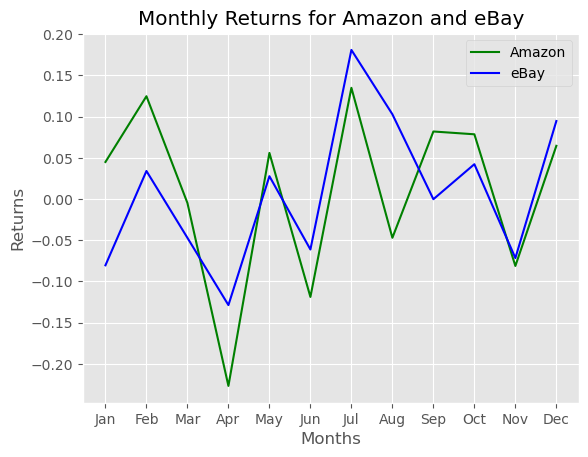

In [14]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
amazon_returns = [0.045, 0.1248, -0.0048, -0.2268, 0.056, -0.1188, 0.135, -0.047, 0.082, 0.0786, -0.0812, 0.0646]
ebay_returns = [-0.0804, 0.03405, -0.04708, -0.1287, 0.02772, -0.0612, 0.1810, 0.1029, -0.0002, 0.0423, -0.0716, 0.0947]

#use style ggplot
plt.style.use('ggplot')

fig, ax = plt.subplots()


ax.plot(months, amazon_returns, label='Amazon', color='green')


ax.plot(months, ebay_returns, label='eBay', color='blue')


ax.set_title('Monthly Returns for Amazon and eBay')
ax.set_xlabel('Months')
ax.set_ylabel('Returns')


ax.legend()


plt.show()


Viz 1 shows us that their is a moderate strong correlation between Amazon and eBay's Monthly Returns, with eBay dominating in keeping a less volatile shift motnh to month, and Amazon showing a more volatile market.

# Viz 2
further states what viz 1 visualizes

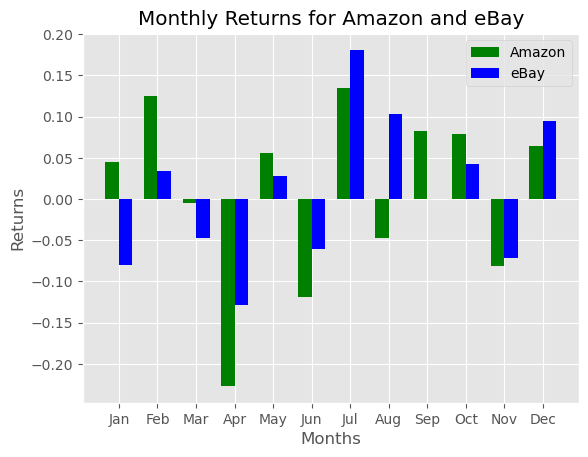

In [15]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
amazon_returns = [0.045, 0.1248, -0.0048, -0.2268, 0.056, -0.1188, 0.135, -0.047, 0.082, 0.0786, -0.0812, 0.0646]
ebay_returns = [-0.0804, 0.03405, -0.04708, -0.1287, 0.02772, -0.0612, 0.1810, 0.1029, -0.0002, 0.0423, -0.0716, 0.0947]

x = np.arange(len(months))  
width = 0.35  

fig, ax = plt.subplots()

rects1 = ax.bar(x - width/2, amazon_returns, width, label='Amazon', color='green')
rects2 = ax.bar(x + width/2, ebay_returns, width, label='eBay', color='blue')

ax.set_xlabel('Months')
ax.set_ylabel('Returns')
ax.set_title('Monthly Returns for Amazon and eBay')
ax.set_xticks(x)
ax.set_xticklabels(months)
ax.legend()

plt.show()

# Viz 3 Correlation throughout the year

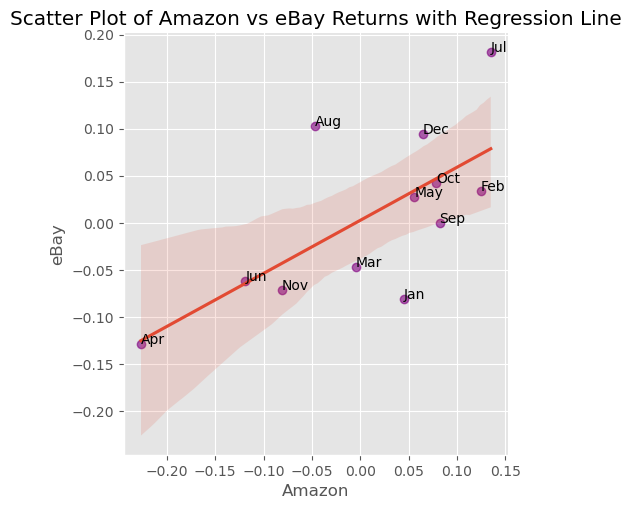

In [16]:
df = pd.DataFrame({
    'Amazon': amazon_returns,
    'eBay': ebay_returns,
    'Month': months
})


sns.lmplot(x='Amazon', y='eBay', data=df, scatter_kws={'color': 'purple', 'alpha':0.6})


plt.title('Scatter Plot of Amazon vs eBay Returns with Regression Line')


for i in range(df.shape[0]):
    plt.text(df.Amazon[i], df.eBay[i], df.Month[i])

plt.show()

Viz 3: provides us with the neccesary visualization to conclude that there is a moderate to strong correlation between the two.

# Conclusion

In this project, we performed a detailed analysis of the monthly stock returns for two leading e-commerce giants, Amazon and eBay. Our analysis encompassed a range of visualizations, including line plots, a bar graph, and scatter plots.

Our findings suggest that both companies exhibit significant month-to-month volatility in their returns. The comparative bar graph clearly illustrates the differing performance of the two companies throughout the year.

The scatter plot provided interesting insights into the correlation between Amazon's and eBay's returns. We found that while there were instances of both companies gaining or losing in the same month, this was not consistently the case. It was apparent from our analysis that the returns for these two companies, while operating in similar sectors, exhibit unique characteristics and are influenced by a host of individual factors.

The regression line plotted on the scatter plot further illustrated the relationship between the two companies' returns. It gave us a visual guide to the overall trend in the correlation, showing the general direction of the relationship between Amazon and eBay returns.

In conclusion, it's evident that despite operating in the same sector, the monthly returns of Amazon and eBay are distinct and exhibit their own trends.